In [5]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


In [2]:
# train_data = torch.load('../../Gesture/train.pt')
# test_data = torch.load('../../Gesture/test.pt')
# val_data = torch.load('../../Gesture/val.pt')

train_data = torch.load('../../HAR/train.pt')
test_data = torch.load('../../HAR/test.pt')
val_data = torch.load('../../HAR/val.pt')

In [3]:
x_train = train_data["samples"]
y_train = train_data["labels"]

x_test = test_data["samples"]
y_test = test_data["labels"]

x_val = val_data["samples"]
y_val = val_data["labels"]

In [4]:
# train data
print("-------------- Train Data ---------------------")
print(f'number of samples: {x_train.shape[0]}, shape of each sample: {x_train.shape[1:]}')
print(f'Labels size: {y_train.shape}')

# test data
print("-------------- Test Data ---------------------")
print(f'number of samples: {x_test.shape[0]}, shape of each sample: {x_test.shape[1:]}')
print(f'Labels size: {y_test.shape}')

# val data
print("-------------- Validation Data ---------------------")
print(f'number of samples: {x_val.shape[0]}, shape of each sample: {x_val.shape[1:]}')
print(f'Labels size: {y_val.shape}')


-------------- Train Data ---------------------
number of samples: 5881, shape of each sample: torch.Size([3, 206])
Labels size: torch.Size([5881])
-------------- Test Data ---------------------
number of samples: 2947, shape of each sample: torch.Size([3, 206])
Labels size: torch.Size([2947])
-------------- Validation Data ---------------------
number of samples: 1471, shape of each sample: torch.Size([3, 206])
Labels size: torch.Size([1471])


In [25]:
def fillMissingValueWithMean_X(sample:torch.Tensor) -> torch.Tensor:

    nSamples = sample.shape[0]
    for i in range(nSamples):
        numOfNanValues = torch.isnan(sample[i]).sum().item()
        if numOfNanValues > 0:
            meanValue = torch.nanmean(sample[i])
            sample[i] = torch.nan_to_num(sample[i], nan=meanValue)
    return sample

def fillMissingValueWithMedian_Y(sample:torch.Tensor) -> torch.Tensor:
    medianValue = torch.nanmedian(sample)
    sample = torch.nan_to_num(sample, nan=medianValue)
    return sample



def ScaledX(sample:torch.Tensor) -> torch.Tensor:
    dimensional_means = sample.mean(dim=(0,2), keepdim=True)
    dimensional_std = sample.std(dim=(0,2), keepdim=True)

    scaled_sample = (sample - dimensional_means) / dimensional_std
    return scaled_sample


In [26]:
## scaled
x_train, y_train = fillMissingValueWithMean_X(x_train), fillMissingValueWithMedian_Y(y_train)
x_test, y_test = fillMissingValueWithMean_X(x_test), fillMissingValueWithMedian_Y(y_test)
x_val, y_val = fillMissingValueWithMean_X(x_val), fillMissingValueWithMedian_Y(y_val)

x_train_scaled, x_test_scaled, x_val_scaled = ScaledX(x_train), ScaledX(x_test), ScaledX(x_val)

number of samples: 320, shape of each sample: torch.Size([3, 206])


In [28]:
har_train = torch.load('../../HAR/train.pt')
for k,v in har_train.items():
    print(k, v[0])

samples tensor([[0.1904, 0.1911, 0.1900, 0.1898, 0.1899, 0.1883, 0.1886, 0.1879, 0.1831,
         0.1819, 0.1864, 0.1916, 0.1912, 0.1899, 0.1929, 0.1927, 0.1926, 0.1940,
         0.1917, 0.1890, 0.1841, 0.1821, 0.1870, 0.1884, 0.1876, 0.1893, 0.1908,
         0.1905, 0.1888, 0.1897, 0.1935, 0.1961, 0.1918, 0.1843, 0.1846, 0.1853,
         0.1819, 0.1827, 0.1860, 0.1913, 0.1942, 0.1923, 0.1934, 0.1943, 0.1940,
         0.1936, 0.1889, 0.1845, 0.1824, 0.1830, 0.1842, 0.1835, 0.1871, 0.1911,
         0.1895, 0.1881, 0.1880, 0.1873, 0.1863, 0.1860, 0.1863, 0.1869, 0.1879,
         0.1875, 0.1873, 0.1878, 0.1873, 0.1875, 0.1877, 0.1883, 0.1893, 0.1885,
         0.1866, 0.1839, 0.1829, 0.1855, 0.1880, 0.1888, 0.1899, 0.1907, 0.1902,
         0.1898, 0.1881, 0.1842, 0.1823, 0.1835, 0.1838, 0.1842, 0.1871, 0.1893,
         0.1899, 0.1905, 0.1902, 0.1890, 0.1879, 0.1871, 0.1875, 0.1877, 0.1873,
         0.1878, 0.1884, 0.1890, 0.1891, 0.1886, 0.1890, 0.1890, 0.1891, 0.1908,
         0.1916, 0.1

In [30]:
har_x_train = har_train["samples"]
har_y_train = har_train["labels"]
print(har_x_train.shape)

torch.Size([5881, 3, 206])


tensor([0., 1., 2., 3., 4., 5.], dtype=torch.float64)

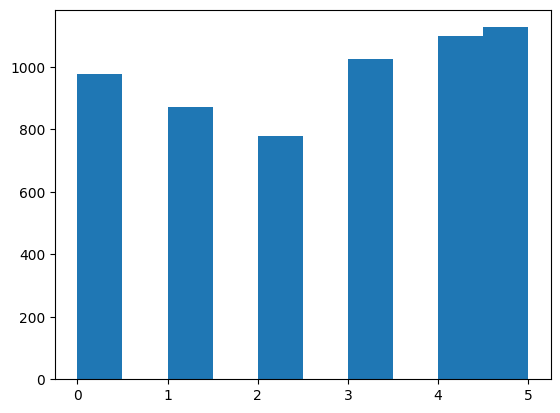

In [6]:
plt.hist(y_train)
plt.show()
